In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [115]:
from glob import glob 
glob('./*')

['./Predict_bad_loan.ipynb', './Loan_Dataset.csv']

In [116]:
df = pd.read_csv('Loan_Dataset.csv')

In [117]:
df.head()

,id,grade,annual_income,short_employee,emp_length_num,home_ownership,Debt-To-Income Ratio,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_income          20000 non-null  int64  
 3   short_employee         20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   Debt-To-Income Ratio   19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [119]:
#last_major_derog_none - 1 when the loaner has a bad rating for at least 90 days.
df.last_major_derog_none.value_counts()

1.0    436
0.0    138
Name: last_major_derog_none, dtype: int64

In [120]:
#decide how to deal with missing values

#since the majority of the values in last_major_derog_none are missing, dropping the whole column
df.drop(columns= ['last_major_derog_none'], inplace=True)
df.shape

(20000, 14)

In [121]:
df.fillna('NA',inplace=True)

In [124]:
df.home_ownership.value_counts()

MORTGAGE    9844
RENT        7052
OWN         1613
NA          1491
Name: home_ownership, dtype: int64

In [125]:
#is missing values in home_ownership related to the target, bad_loan?
#if yes, then we should not just drop all the rows with missing home_ownership values
#if no, then we can drop those rows
#use chi-square test to figure it out

#table = df.groupby(['bad_loan','home_ownership']).id.agg(['count'])
table = pd.crosstab(df.bad_loan, df.home_ownership,margins=True, margins_name='Total')
table

home_ownership,MORTGAGE,NA,OWN,RENT,Total
bad_loan,,,,,
0,8136,1199,1297,5368,16000
1,1708,292,316,1684,4000
Total,9844,1491,1613,7052,20000


In [126]:
table_2 = list(table.loc[[0,1],'NA']), list(table.loc[[0,1],'Total'])
table_2

([1199, 292], [16000, 4000])

In [135]:
chi2_stat, p_value, dof, expected_values = chi2_contingency(table_2)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected values table:")
print(expected_values)

if p_value < 0.05:
  print(f'Chi-square Statistic is {chi2_stat}. P-value is {p_value}. Reject the null hypothesis. The number of missing values in home_ownership and bad_loan are dependent. Observations with missing home_ownership values may not be dropped.')
else:
  print(f'Chi-square Statistic is {chi2_stat}. P-value is {p_value}. Fail to reject the null hypothesis. The number of missing values in home_ownership and bad_loan are independent. Observations with missing home_ownership values may be dropped. Remaining observations will still represent the population.')

Chi-square statistic: 0.125226721135046
P-value: 1.1774832272384763e-23
Degrees of freedom: 1
Expected values table:
[[ 1193.23014285   297.76985715]
 [16005.76985715  3994.23014285]]
Chi-square Statistic is 0.125226721135046. P-value is 0.7234334047142614. Fail to reject the null hypothesis. The number of missing values in home_ownership and bad_loan are independent. Observations with missing home_ownership values may be dropped. Remaining observations will still represent the population.


In [128]:
row_num_be4 = df.shape[0]
row_num_to_drop = df.home_ownership.value_counts()['NA']

df = df[df.home_ownership!='NA']
row_num_aft = df.shape[0]

assert row_num_aft == row_num_be4 - row_num_to_drop

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18509 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18509 non-null  int64  
 1   grade                 18509 non-null  object 
 2   annual_income         18509 non-null  int64  
 3   short_employee        18509 non-null  int64  
 4   emp_length_num        18509 non-null  int64  
 5   home_ownership        18509 non-null  object 
 6   Debt-To-Income Ratio  18509 non-null  object 
 7   purpose               18509 non-null  object 
 8   term                  18509 non-null  object 
 9   last_delinq_none      18509 non-null  int64  
 10  revol_util            18509 non-null  float64
 11  total_rec_late_fee    18509 non-null  float64
 12  od_ratio              18509 non-null  float64
 13  bad_loan              18509 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.1+ MB


In [134]:
#after dropping all the rows with missing home ownership info, there is no more missing value
df.isna().sum(axis=0).sum()

0

In [136]:
df.describe()

,id,annual_income,short_employee,emp_length_num,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,1.850900e+04,18509.000000,18509.000000,18509.000000,18509.000000,18509.000000,18509.000000,18509.000000,18509.000000
mean,7.593696e+06,73453.050516,0.112324,6.824680,0.546329,55.982246,0.293864,0.505273,0.200335
std,1.609183e+06,45581.970623,0.315773,3.769353,0.497862,43.302865,3.140943,0.287919,0.400262
min,5.860400e+05,8412.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.000000
25%,6.206410e+06,47000.000000,0.000000,3.000000,0.000000,38.700000,0.000000,0.257677,0.000000
50%,7.379923e+06,65000.000000,0.000000,7.000000,1.000000,57.100000,0.000000,0.508451,0.000000
75%,8.775849e+06,88000.000000,0.000000,11.000000,1.000000,74.000000,0.000000,0.754602,0.000000
max,1.145464e+07,1000000.000000,1.000000,11.000000,1.000000,5010.000000,96.466600,0.999894,1.000000


In [ ]:
'''
From the variable_description file:
Short _ emp - 1 when the borrower has been employed for 1 year or less.
Emp _ length _ num - Number of years worked (in years). It ranges from 0 to 10, 
where 0 means less than a year and 10 means a decade or more.
'''

#mmm, i see max is 11 in emp_length_num. not a big deal??

In [144]:
#double check to make sure obs with value 1 in short_employee have emp_length_num <=1

assert (df[df.short_employee==1]['emp_length_num']<=1).mean() ==1

In [145]:
df.head()

,id,grade,annual_income,short_employee,emp_length_num,home_ownership,Debt-To-Income Ratio,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0


In [161]:
counts = df.grade.value_counts()
perc = counts/len(df.grade)
counts, perc

(B    5587
 C    5168
 D    3259
 A    1986
 E    1536
 F     816
 G     157
 Name: grade, dtype: int64,
 B    0.301853
 C    0.279216
 D    0.176077
 A    0.107299
 E    0.082987
 F    0.044087
 G    0.008482
 Name: grade, dtype: float64)

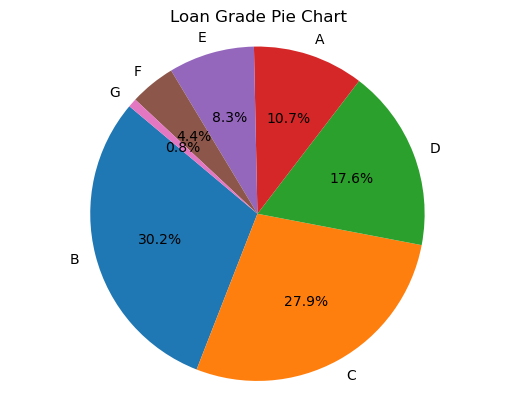

In [179]:
plt.pie(perc, labels=list(counts.index), autopct='%1.1f%%', startangle=140)
plt.title('Loan Grade Pie Chart')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

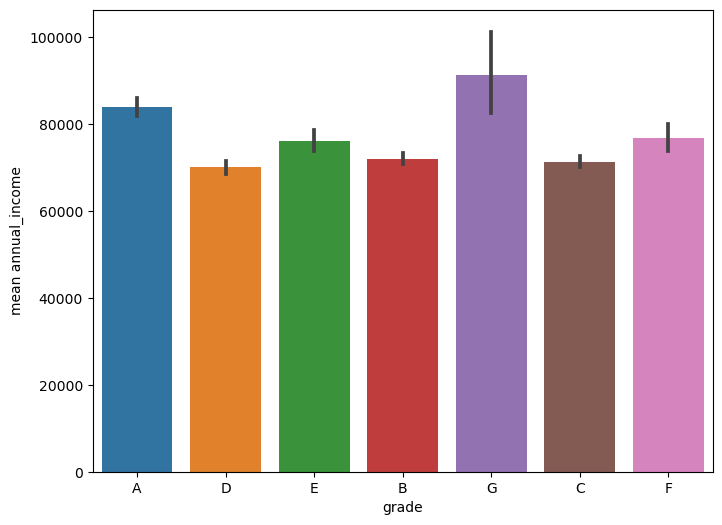

In [171]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

sns.barplot(x='grade',y='annual_income',data=df,estimator=np.mean,ci=95);
ax.set_ylabel('mean annual_income');